<a href="https://colab.research.google.com/github/MaryAdewunmi/Loan-Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split



***Importing dataset***

In [2]:
from google.colab import files
uploaded = files.upload()

Saving loan_test.csv to loan_test.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving loan_train.csv to loan_train.csv


In [4]:
df=pd.read_csv('loan_test.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
df1=pd.read_csv('loan_train.csv')
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


***Data Cleaning***

In [6]:
df.shape

(367, 12)

In [7]:
df1.shape

(614, 13)

In [8]:
df.isnull

<bound method DataFrame.isnull of       Loan_ID Gender Married  ... Loan_Amount_Term Credit_History Property_Area
0    LP001015   Male     Yes  ...            360.0            1.0         Urban
1    LP001022   Male     Yes  ...            360.0            1.0         Urban
2    LP001031   Male     Yes  ...            360.0            1.0         Urban
3    LP001035   Male     Yes  ...            360.0            NaN         Urban
4    LP001051   Male      No  ...            360.0            1.0         Urban
..        ...    ...     ...  ...              ...            ...           ...
362  LP002971   Male     Yes  ...            360.0            1.0         Urban
363  LP002975   Male     Yes  ...            360.0            1.0         Urban
364  LP002980   Male      No  ...            360.0            NaN     Semiurban
365  LP002986   Male     Yes  ...            360.0            1.0         Rural
366  LP002989   Male      No  ...            180.0            1.0         Rural

[367 

In [9]:
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)


In [10]:
missed_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missed_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


***This showed that Loan_status,Property_Area ,Coapplicantincome,Applicantincome,Education and Loan_ID have empty values***

In [11]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df1['Gender'] = df1['Gender'].fillna(df1['Gender'].dropna().mode().values[0])

In [13]:
df['Gender'] = df['Gender'].fillna(df['Gender'].dropna().mode().values[0])

In [14]:
df['Married'] = df['Married'].fillna(df['Married'].dropna().mode().values[0])

In [15]:
df1['Married'] = df1['Married'].fillna(df1['Married'].dropna().mode().values[0])

In [16]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].dropna().mode().values[0])

In [17]:
df1['Dependents'] = df1['Dependents'].fillna(df1['Dependents'].dropna().mode().values[0])

In [18]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].dropna().mode().values[0])

In [19]:
df1['Self_Employed'] = df1['Self_Employed'].fillna(df1['Self_Employed'].dropna().mode().values[0])

In [20]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].dropna().mode().values[0])

In [21]:
df1['LoanAmount'] = df1['LoanAmount'].fillna(df1['LoanAmount'].dropna().mode().values[0])

In [22]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].dropna().mode().values[0])

In [23]:
df1['Loan_Amount_Term'] = df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].dropna().mode().values[0])

In [24]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].dropna().mode().values[0])

In [25]:
df1['Credit_History'] = df1['Credit_History'].fillna(df1['Credit_History'].dropna().mode().values[0])

In [26]:
df1['Loan_Status'] = df1['Loan_Status'].fillna(df1['Loan_Status'].dropna().mode().values[0])

In [27]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

In [28]:
total1 = df1.isnull().sum().sort_values(ascending=False)
percent1 = (df1.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

In [29]:
missed_data1 = pd.concat([total1, percent1], axis=1, keys=['Total', 'Percent'])
missed_data1.head(20)

,Total,Percent
Loan_Status,0,NaN
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


***Data Visualization***

In [30]:
import seaborn as sns

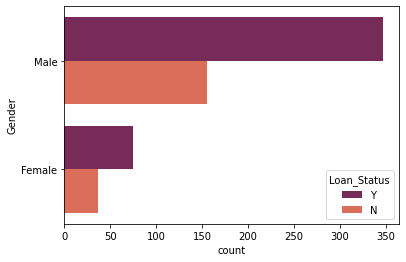

In [31]:
sns.countplot(y = 'Gender', hue = 'Loan_Status', palette = 'rocket', color = 'k', data = df1)

***This figure shows that Male collects Loans more than Female***

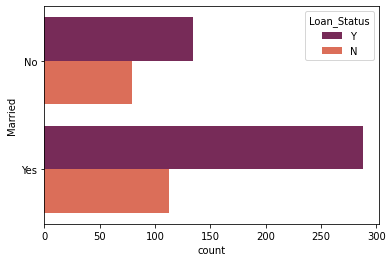

In [32]:
sns.countplot(y = 'Married', hue = 'Loan_Status', palette = 'rocket', color = 'k', data = df1)

***This figure above shows that Married people collects loans more than Singles***

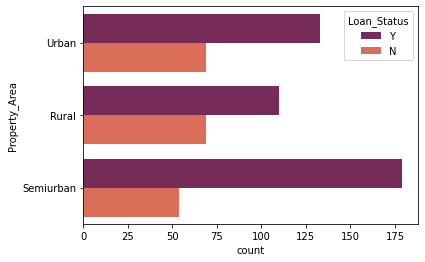

In [33]:
sns.countplot(y = 'Property_Area', hue = 'Loan_Status',  palette = 'rocket', color = 'k', data = df1)

***This figure above shows that People that lives in the Semi-Urban collects loans more than people living in Urban and Rural areas***.

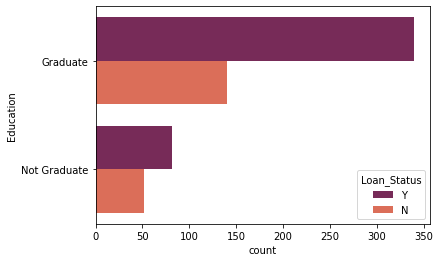

In [34]:
sns.countplot(y = 'Education', hue = 'Loan_Status', palette = 'rocket', color = 'k', data = df1)


***This figure shows that Graduates collects loan more than Non-Graduates***

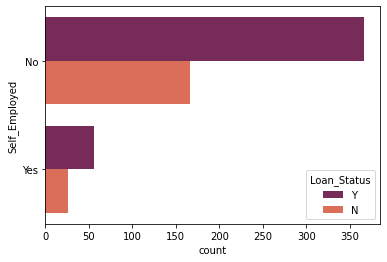

In [35]:
sns.countplot(y = 'Self_Employed', palette = 'rocket', color = 'k', hue = 'Loan_Status', data = df1)

***This shows that People that are not self-employed collects loan more than Self-Employed.***

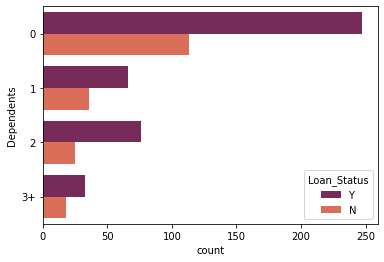

In [36]:
sns.countplot(y = 'Dependents', palette = 'rocket', color = 'k', hue = 'Loan_Status', data = df1)

***People who do not have dependants collects loan than people with 1 to 3 dependents.This is interesting..Just thinking loud***

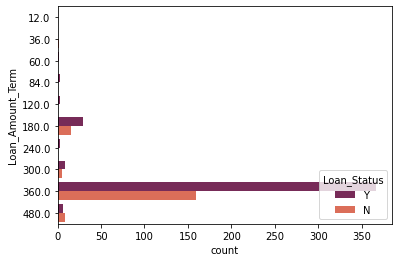

In [37]:
sns.countplot(y = 'Loan_Amount_Term', hue = 'Loan_Status', palette = 'rocket', color = 'k', data = df1)

***People prefer loan term that within a year than the rest***

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [39]:
from sklearn.preprocessing import LabelEncoder


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [41]:
df2 = pd.get_dummies(df1[['Gender']])
df1_new=pd.concat([df1,df2],axis=1)
df1_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0,1


In [44]:
obj_df["body_style"] = obj_df["body_style"].astype('category')
obj_df.dtypes

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Education_Graduate,Education_Not Graduate
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,1,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1,0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1,0


In [47]:
df1["Married"] = df1["Married"].astype('category')
df1["Dependents"] = df1["Dependents"].astype('category')
df1["Property_Area"] = df1["Property_Area"].astype('category')
df1["Loan_Status"] = df1["Loan_Status"].astype('category')
df1["Self_Employed"] = df1["Self_Employed"].astype('category')
df1["Education"] = df1["Education"].astype('category')
df1["Gender"] = df1["Gender"].astype('category')
df1.dtypes

Loan_ID                object
Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
Loan_Status          category
dtype: object

In [49]:

df1["Married_cat"] = df1["Married"].cat.codes
df1["Dependents_cat"] = df1["Dependents"].cat.codes
df1["Property_Area_cat"] = df1["Property_Area"].cat.codes
df1["Loan_Status_cat"] = df1["Loan_Status"].cat.codes
df1["Self_Employed_cat"] = df1["Self_Employed"].cat.codes
df1["Education_cat"] = df1["Education"].cat.codes
df1["Gender_cat"] = df1["Gender"].cat.codes
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_cat,Dependents_cat,Property_Area_cat,Loan_Status_cat,Self_Employed_cat,Education_cat,Gender_cat
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,0,0,2,1,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0,0,0,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0,2,1,1,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,2,1,0,1,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,0,2,1,0,0,1


In [50]:
df1.info

<bound method DataFrame.info of       Loan_ID  Gender Married  ... Self_Employed_cat Education_cat Gender_cat
0    LP001002    Male      No  ...                 0             0          1
1    LP001003    Male     Yes  ...                 0             0          1
2    LP001005    Male     Yes  ...                 1             0          1
3    LP001006    Male     Yes  ...                 0             1          1
4    LP001008    Male      No  ...                 0             0          1
..        ...     ...     ...  ...               ...           ...        ...
609  LP002978  Female      No  ...                 0             0          0
610  LP002979    Male     Yes  ...                 0             0          1
611  LP002983    Male     Yes  ...                 0             0          1
612  LP002984    Male     Yes  ...                 0             0          1
613  LP002990  Female      No  ...                 1             0          0

[614 rows x 20 columns]>

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             614 non-null    category
 2   Married            614 non-null    category
 3   Dependents         614 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      614 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         614 non-null    float64 
 9   Loan_Amount_Term   614 non-null    float64 
 10  Credit_History     614 non-null    float64 
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
 13  Married_cat        614 non-null    int8    
 14  Dependents_cat     614 non-null    int8    
 15  Property_Area_cat  614 non-null    int8    
 16  Loan_Sta

In [54]:
df1.drop(['Loan_ID'],axis =1,inplace = True)

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             614 non-null    category
 1   Married            614 non-null    category
 2   Dependents         614 non-null    category
 3   Education          614 non-null    category
 4   Self_Employed      614 non-null    category
 5   ApplicantIncome    614 non-null    int64   
 6   CoapplicantIncome  614 non-null    float64 
 7   LoanAmount         614 non-null    float64 
 8   Loan_Amount_Term   614 non-null    float64 
 9   Credit_History     614 non-null    float64 
 10  Property_Area      614 non-null    category
 11  Loan_Status        614 non-null    category
 12  Married_cat        614 non-null    int8    
 13  Dependents_cat     614 non-null    int8    
 14  Property_Area_cat  614 non-null    int8    
 15  Loan_Status_cat    614 non-null    int8    
 16  Self_Emp

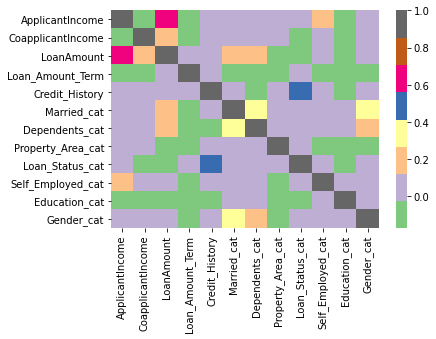

In [70]:
sns.heatmap(df1.corr(), cmap = "Accent")

In [ ]:
y = df_train[Loan_Status]
X = df_train.drop(‘Loan_Status’, axis = 1)

In [78]:
y = df1.Loan_Status



In [81]:
X = df1.drop('Loan_Status',axis = 1)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [83]:
lr = logisticRegression()
lr.fit(X_train,y_test)

NameError: ignored

In [ ]:
ypredict

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))